# Explore here

In [1]:
# image classifer project
# Your code he# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

2025-01-23 21:24:49.562412: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 21:24:49.893615: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 21:24:50.072696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737667490.351125     529 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737667490.846370     529 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 21:24:54.857378: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

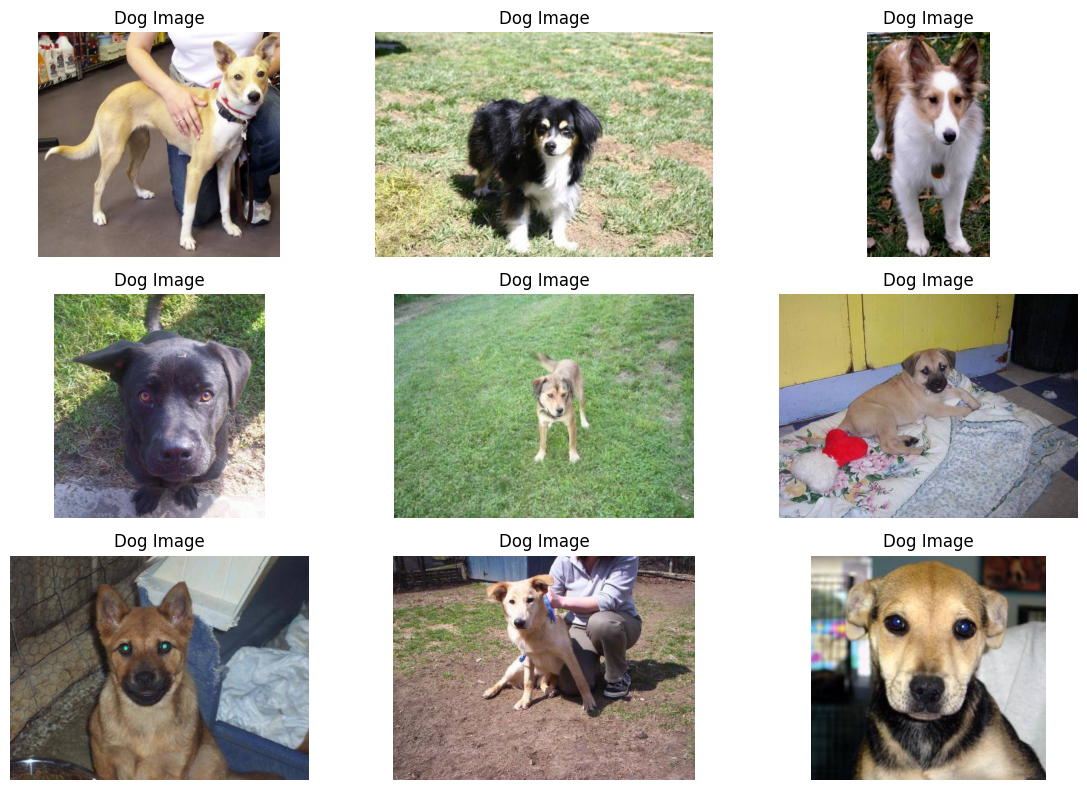

In [2]:
# Import and Check first 9 Dog Pictures (from the training set)

# Path to the directory containing your image data
train_dir = "../data/train"

# Get a list of all dog image file names
dog_subfolder = os.path.join(train_dir, "dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

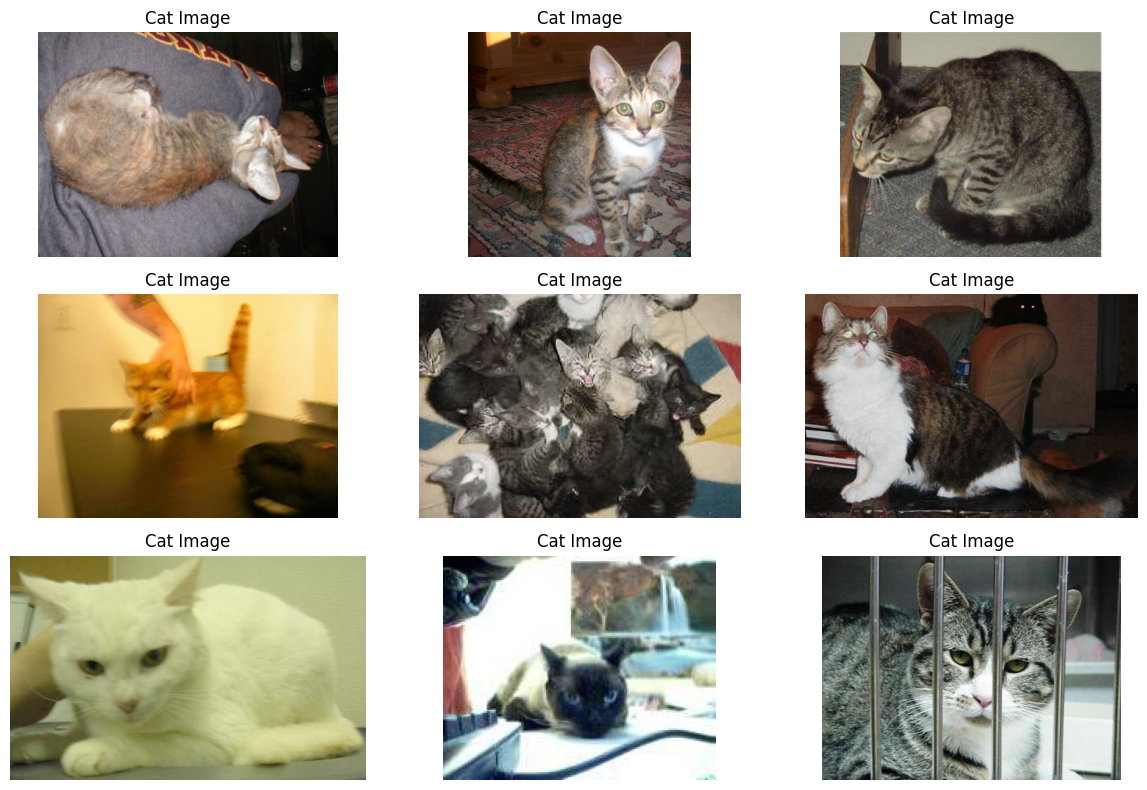

In [3]:
# Import and Check first 9 Cat Pictures

# Get a list of all cat image file names
cats_subfolder = os.path.join(train_dir, "cat")

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [4]:
# Define a few rules for DataGen
image_size = (124, 124)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test directory
test_dir = "../data/test"

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

Found 77 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [5]:
# Load the VGG16 model without the top layer (we'll add our own)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(124, 124, 3))


2025-01-23 21:25:13.342755: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False 

In [7]:
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(1, activation='sigmoid')(x)  # Binary classification (cat or dog)

In [8]:
# Build the model
model = Model(inputs=base_model.input, outputs=x)

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
# Display model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 124, 124, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 124, 124, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 124, 124, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 62, 62, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 31, 31, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 31, 31, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 31, 31, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,894,849 (60.63 MB)

 Trainable params: 1,180,161 (4.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
# Rescale validation set
val_datagen = ImageDataGenerator(rescale=1./255)


In [13]:
# Load training and validation data
train_data = train_datagen.flow_from_directory(
    '../data/train',
    target_size=(124, 124),
    batch_size=32,
    class_mode='binary'
)

Found 77 images belonging to 2 classes.


In [14]:
val_data = val_datagen.flow_from_directory(
    '../data/test',
    target_size=(124, 124),
    batch_size=32,
    class_mode='binary'
)

Found 10 images belonging to 1 classes.


In [15]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)


/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-01-23 21:25:16.726676: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51171328 exceeds 10% of free system memory.
2025-01-23 21:25:16.967681: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51171328 exceeds 10% of free system memory.
2025-01-23 21:25:17.229555: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25585664 exceeds 10% of free system memory.
2025-01-23 21:25:17.354834: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25585664 exceeds 10% of free system memory.


1/2 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.3846 - loss: 0.6601

2025-01-23 21:25:19.987043: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125960192 exceeds 10% of free system memory.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4256 - loss: 0.6916

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 9s/step - accuracy: 0.4393 - loss: 0.7022 - val_accuracy: 0.5000 - val_loss: 0.7007
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 5s 6s/step - accuracy: 0.4688 - loss: 0.7678

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4688 - loss: 0.7678 - val_accuracy: 0.9000 - val_loss: 0.5940
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 8s/step - accuracy: 0.4433 - loss: 0.8244 - val_accuracy: 1.0000 - val_loss: 0.4252
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4375 - loss: 0.8764 - val_accuracy: 1.0000 - val_loss: 0.4267
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5370 - loss: 0.7370 - val_accuracy: 0.9000 - val_loss: 0.5151
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6875 - loss: 0.6015 - val_accuracy: 0.9000 - val_loss: 0.5701
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6380 - loss: 0.6346 - val_accuracy: 0.7000 - val_loss: 0.6600
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7500 - loss: 0.6116 - val_accuracy: 0.6000 - val_loss: 0.7161
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.7197 - loss: 0.5535 - val_accuracy: 0.2000 - val_loss: 0.7973
Epoch 10/10
2/2 ━━━━━━━

In [16]:
# Save the model
#model.save('cat_dog_classifier_vgg16.h5')